In [149]:
# Import project dependencies

# Pandas
import pandas as pd

# Numpy
import numpy as np

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, accuracy_score,
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.manifold import TSNE 

# NLTK
from nltk.corpus import stopwords
from nltk import  word_tokenize

# Keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D, Dropout
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.initializers import Constant
from keras import backend as K
from keras.layers import MaxPool1D
from keras.models import Model
from keras.layers.core import *
from keras.models import *
from keras.layers import LSTM, concatenate,Bidirectional,Multiply

#Seq2Seq
from keras_self_attention import SeqSelfAttention

# Tensorflow
from tensorflow.keras.layers import Attention

# Matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Other dependencies
from scipy import spatial
import io
import os
import re
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns

In [150]:
# Read csv dataset and save to df

filePath = 'TOTAL_TEXTS_SETOPATI.csv'
df = pd.read_csv(filePath)

# Define Constant Variables
VALIDATION_SPLIT = 0.1
MAX_SEQUENCE_LENGTH = 1000
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 300

# computing number of rows
rows = len(df.axes[0])
 
# computing number of columns
cols = len(df.axes[1])
print("DataFrame Size: "+ str(df.size))
print("Row Size: "+ str(rows))
print("Column Size: "+ str(cols))
print("\n")
print(df["text"][1])

DataFrame Size: 520235
Row Size: 104047
Column Size: 5


\n\tकाठमाडौंको कीर्तिपुर क्रिकेट मैदानमा भोलि हुने नेपाल र नामिवियाबीचको खेलमा नेपाल प्रहरीले सुरक्षाका लागि प्रहरी उपरीक्षकको कमाण्डमा ७ सय ७३ जना प्रहरी परिचालन गर्ने भएको छ।\n\n\t\xa0\n\n\tमहानगरीय प्रहरी कार्यालय रानीपोखरीले शुक्रबार पत्रकार सम्मेलन गरेर काठमाडौं प्रहरी परिसरका एसपी प्रद्युम्न कार्कीको कमाण्डमा ७ सय ७३ जना प्रहरी परिचालन गर्ने एआईजी प्रतापसिंह थापाले जानकारी दिए।\xa0\n\n\t\xa0\n\n\tथापाका अनुसार सादा पोशाकमा पनि प्रहरी परिचालन गरिनेछ। नेपाल प्रहरीको साथै खेल मैदानमा सशस्त्र प्रहरी बलका सय भन्दा बढी प्रहरी पनि परिचालन हुने भएको छ।थप आवश्यक परे सशस्त्र प्रहरी अरु पनि खटाउन सकिने सशस्त्र प्रहरीका प्रवक्ता डिआइजी शैलेन्द्र खनालले बताए। क्रिकेट मैदानसँगै भित्र पट्टि नेपाल प्रहरीको एक घेरा हुनेछ भने त्यसपछि दर्शकमाझ र दर्शकबाहिर गरी ३ घेरा राखिने प्रहरीले बताएको छ। \xa0\n\n\t\xa0\n\n\tनेपाल प्रहरीको घेराबाहिर सशस्त्र प्रहरीले पनि मैदानलाई सुरक्षा दिने प्रहरीले बताएको छ। अन्तर्राष्ट्रियस्तरको खेल भएकाले सुरक्षा पनि 

In [151]:
#Preprocessing {Remove Stop words using nltk}

stop_words = stopwords.words("nepali")
def string_manipulation(df,column)  : 
    df[column] = df[column].apply(remove_special_characters)
    df[column] = df[column].apply(remove_non_nepali_characters)
    df[column] = df[column].apply(lambda x: " ".join([i for i in x.split()if i not in (stop_words)]))
    return df

def remove_special_characters(input_string):
    return re.sub('[।(),<<?!,—,–,/,’,‘,:,\u200d]', '', input_string)

def remove_non_nepali_characters(input_string):
    return re.sub(r'[^\u0900-\u097F\s]', '', input_string)

Data = string_manipulation(df,"text")
print(Data["text"][1])

काठमाडौंको कीर्तिपुर क्रिकेट मैदानमा भोलि नेपाल नामिवियाबीचको खेलमा नेपाल प्रहरीले सुरक्षाका प्रहरी उपरीक्षकको कमाण्डमा ७ सय ७३ जना प्रहरी परिचालन छमहानगरीय प्रहरी कार्यालय रानीपोखरीले शुक्रबार पत्रकार सम्मेलन काठमाडौं प्रहरी परिसरका एसपी प्रद्युम्न कार्कीको कमाण्डमा ७ सय ७३ जना प्रहरी परिचालन एआईजी प्रतापसिंह थापाले जानकारी दिएथापाका सादा पोशाकमा प्रहरी परिचालन गरिनेछ नेपाल प्रहरीको खेल मैदानमा सशस्त्र प्रहरी बलका सय बढी प्रहरी परिचालन छथप आवश्यक परे सशस्त्र प्रहरी खटाउन सकिने सशस्त्र प्रहरीका प्रवक्ता डिआइजी शैलेन्द्र खनालले बताए क्रिकेट मैदानसँगै पट्टि नेपाल प्रहरीको घेरा हुनेछ त्यसपछि दर्शकमाझ दर्शकबाहिर ३ घेरा राखिने प्रहरीले बताएको नेपाल प्रहरीको घेराबाहिर सशस्त्र प्रहरीले मैदानलाई सुरक्षा दिने प्रहरीले बताएको अन्तर्राष्ट्रियस्तरको खेल भएकाले सुरक्षा अन्तर्राष्ट्रियस्तरकै एआईजी थापाले बताए खेलाडीहरुलाई होटलदेखि मैदानसम्मको सुरक्षा जिम्मा प्रहरीलाई दिइएको नेपालमा अन्तर्राष्ट्रियस्तरको सुरक्षा प्रदान आईसीसीले पत्र पठाएपछि महानगरीय प्रहरी कार्यालय रानीपोखरीले लिखित रुपमा मैदानमा अपन

In [152]:
# convert word into vector

print('Indexing word vectors.')
embeddings_dict = {}

# Used NPVec1: Word Embeddings for Nepali for glove from [https://github.com/nowalab/nepali-word-embeddings]
# processed.glove.txt, processed_normalized_stemmed.glove 

with open("processed.glove", 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        token = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[token] = vector

print('Found %s word vectors.' % len(embeddings_dict))

Indexing word vectors.
Found 663564 word vectors.


In [153]:
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [154]:
# second, prepare text samples and their labels

newsTexts = Data['text'].tolist()
labels_index = {}  # dictionary mapping label name to numeric id
labels = [] # list of label ids
allCategoryDataList = Data['catagory']

indexCount = 0
for category in allCategoryDataList.unique():
    labels_index[category] = indexCount
    indexCount = indexCount + 1

for category in allCategoryDataList.tolist():
    labels.append(labels_index[category])
        
display(df.loc[0:4])



,catagory,heading,text,date,link
0,new-news,मेसीलाई तुरुन्त अनुबन्धित गर्न बार्सिलोनालाई न...,ब्राजिलका स्टार स्ट्राइकर नेइमारले अर्जेन्टिनी...,"बुधबार, वैशाख २७, २०७४, ००:४२:२९",https://dev.setoparty.com/new-news/45151
1,archive-news,नेपाल र नामिबियाबीचको खेलमा यस्तो छ सुरक्षा,काठमाडौंको कीर्तिपुर क्रिकेट मैदानमा भोलि नेपा...,2016-04-15 16:41:04,https://dev.setoparty.com/archive-news/45151
2,politics,अलबिदा मणी शाह (भिडियो र फोटोफिचर),नेपाली राष्ट्रिय फुटबल टोलीका खेलाडी मणी विक्र...,"मंगलबार, जेठ १, २०७५, ०३:०५:४२",https://dev.setoparty.com/politics/158282
3,politics,मलेसियालाई १० विकेटले हराउँदै नेपाल एसिया कपमा...,मलेसियालाई १० विकेटको फराकिलो अन्तरमा हराउँदै ...,"शनिबार, भदौ ३१, २०७४, ०३:२२:४७",https://dev.setoparty.com/politics/87233
4,sports,अर्धसतक पूरा गर्दै अाउट भए ज्ञानेन्द्र,विश्व क्रिकेट लिग डब्लुसिएल च्याम्पियनसिप नेपा...,"बुधबार, मंसिर २०, २०७४, ०२:११:१६",https://dev.setoparty.com/sports/111454


In [155]:
# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(newsTexts)
sequences = tokenizer.texts_to_sequences(newsTexts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labelsCategorical = to_categorical(np.asarray(labels))

print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labelsCategorical.shape)
print('label tensor:', labelsCategorical[0])

# split the data into a training set(70%) and a validation set(30%)
indices = np.arange(data.shape[0])
# np.random.shuffle(indices)
data = data[indices]
finalLabels = labelsCategorical[indices]
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-num_validation_samples]
y_train = finalLabels[:-num_validation_samples]
x_val = data[-num_validation_samples:]
y_val = finalLabels[-num_validation_samples:]

Found 874272 unique tokens.
Shape of data tensor: (104047, 1000)
Shape of label tensor: (104047, 63)
label tensor: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [156]:
# # load json and create model
# # from keras.models import model_from_json 
# from tensorflow.keras.models import Sequential, model_from_json
# from keras_self_attention import SeqSelfAttention


# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json, custom_objects={'SeqSelfAttention': SeqSelfAttention})
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")
 
# # evaluate loaded model on test data
# # loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# loaded_model.compile(optimizer='adam', loss='mse', metrics=['acc', f1_m, precision_m, recall_m])

# score = loaded_model.evaluate(x_val, y_val, verbose=0)
# index = 0
# for metric in loaded_model.metrics_names:
#     print("%s: %.2f%%" % (metric, score[index]*100))
#     index = index + 1

In [157]:
print('Preparing embedding matrix.')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_dict.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

print("done")

Preparing embedding matrix.
done


In [158]:
# print('Training model. CNN CNN Model.')

# # train a 1D convnet with global maxpooling
# sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# embedded_sequences = embedding_layer(sequence_input)

# x = Conv1D(128, 5, activation='relu')(embedded_sequences)
# x1 = Dropout(0.2)(x)
# x2 = MaxPooling1D(5)(x1)
# x3 = Conv1D(128, 5, activation='relu')(x2)
# x4 = Dropout(0.3)(x3)
# x5 = MaxPooling1D(5)(x4)
# x6 = Conv1D(128, 5, activation='relu')(x5)
# x7 = GlobalMaxPooling1D()(x6)
# x8 = Dense(128, activation='relu')(x7)
# print("len labels:", str(len(labels_index)))
# preds = Dense(len(labels_index), activation='softmax')(x8)

# print("Preds shape: ", preds.shape)
# print("sequence_input shape: ", sequence_input.shape)

# model = Model(sequence_input, preds)
# model.compile(loss='categorical_crossentropy',
#               optimizer='rmsprop',
#               metrics=['acc', f1_m, precision_m, recall_m])

# print("Shape of x_train: ", x_train.shape)
# print("Shape of y_train: ", y_train.shape)
# print("Shape of x_val: ", x_val.shape)
# print("Shape of y_val: ", y_val.shape)
# print(model.output_shape)
# model.summary()


# history = model.fit(x_train, y_train,
#           batch_size=128,
#           epochs=15,
#           validation_data=(x_val, y_val))

In [159]:
# print('Training model. CNN biLstm Model.')
# from keras.models import Sequential
# from keras.layers import Embedding
# from tensorflow.keras.layers import Bidirectional
# from keras.layers import LSTM
# from keras.layers import Activation
# from keras.layers import Flatten


# sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
# embedded_sequences = embedding_layer(sequence_input)

# model = Sequential()
# model.add(embedding_layer)
# model.add(Conv1D(128, 5, activation='relu'))
# model.add(MaxPooling1D(5))
# model.add(Dropout(0.2)) # embedding dropouts
# model.add(Bidirectional(LSTM(256, return_sequences=True, recurrent_dropout=0.2, activation = 'tanh'))) # weight drop on recurrent layers using recurrent_dropout
# # model.add(GlobalMaxPooling1D())
# # model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(63, activation="softmax"))

# model.summary()
# # model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc', f1_m, precision_m, recall_m])


# train the model
# model.fit(x_train, y_train, X_val=x_val, y_val=y_val,
#     epoch_num=15, optimizer='adam', verbose=True)
# history = model.fit(x_train, y_train,
#           batch_size=128,
#           epochs=15,
#           validation_data=(x_val, y_val))

In [162]:
# CNN Bilstm attention
from keras.layers import Input, Dense, LSTM, concatenate,Conv1D,Dropout,Bidirectional,Multiply
from keras.models import Model
from keras_self_attention import SeqSelfAttention

from tensorflow.keras.layers import Attention
from keras.layers.core import *
from keras.models import *

lstm_units = 64
SINGLE_ATTENTION_VECTOR = False

def hybrid_model():
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    x = Conv1D(filters = 128, kernel_size = 5, activation = 'relu')(embedded_sequences)  #, padding = 'same'
    x = MaxPooling1D(5)(x)
    x = Dropout(0.1)(x)
    lstm_out = Bidirectional(LSTM(128, return_sequences=True))(x)
    lstm_out = Dropout(0.1)(lstm_out)
    attention_mul = SeqSelfAttention(attention_width=15, attention_activation='relu',name='Attention')(lstm_out)
    attention_mul = Flatten()(attention_mul)
    output = Dense(63, activation='softmax')(attention_mul)
    model = Model(inputs=[sequence_input], outputs=output)
    return model

def attention_model():
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    attention_mul = SeqSelfAttention(attention_width=15, attention_activation='relu',name='Attention')(embedded_sequences)
    attention_mul = Dropout(0.2)(attention_mul)
    attention_mul = Flatten()(attention_mul)
    output = Dense(63, activation='sigmoid')(attention_mul)
    model = Model(inputs=[sequence_input], outputs=output)
    return model


def bilstm_model():
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    x = Bidirectional(LSTM(128, return_sequences=True))(embedded_sequences)
    x1 = Dropout(0.2)(lstm_out)
    output = Dense(63, activation='sigmoid')(x1)
    model = Model(inputs=[sequence_input], outputs=output)
    return model

def cnn_model():
    sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
    embedded_sequences = embedding_layer(sequence_input)
    x = Conv1D(filters = 128, kernel_size = 5, activation = 'relu')(embedded_sequences) 
    x1 = MaxPooling1D(5)(x)
    x2 = Dropout(0.2)(x1)
    x3 = Flatten()(x2)
    output = Dense(63, activation='sigmoid')(x3)
    model = Model(inputs=[sequence_input], outputs=output)
    return model

m = hybrid_model()
m.summary()


m.compile(optimizer='adam', loss='mse', metrics=['acc', f1_m, precision_m, recall_m])


Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 1000)]            0         
                                                                 
 embedding_9 (Embedding)     (None, 1000, 300)         6000000   
                                                                 
 conv1d_13 (Conv1D)          (None, 996, 128)          192128    
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 199, 128)         0         
 g1D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 199, 128)          0         
                                                                 
 bidirectional_13 (Bidirecti  (None, 199, 256)         263168    
 onal)                                                    

In [163]:
history = m.fit([x_train], y_train, epochs=100, batch_size=64, validation_split=0.1, validation_data=(x_val, y_val))

Epoch 1/100
1464/1464 [==============================] - 951s 648ms/step - loss: 0.0074 - acc: 0.6752 - f1_m: 0.6685 - precision_m: 0.7881 - recall_m: 0.5850 - val_loss: 0.0084 - val_acc: 0.6401 - val_f1_m: 0.5843 - val_precision_m: 0.7212 - val_recall_m: 0.4954
Epoch 2/100
1464/1464 [==============================] - 942s 643ms/step - loss: 0.0062 - acc: 0.7364 - f1_m: 0.7323 - precision_m: 0.8223 - recall_m: 0.6615 - val_loss: 0.0079 - val_acc: 0.6685 - val_f1_m: 0.6383 - val_precision_m: 0.7243 - val_recall_m: 0.5734
Epoch 3/100
1464/1464 [==============================] - 945s 645ms/step - loss: 0.0056 - acc: 0.7623 - f1_m: 0.7604 - precision_m: 0.8369 - recall_m: 0.6979 - val_loss: 0.0075 - val_acc: 0.6865 - val_f1_m: 0.6638 - val_precision_m: 0.7399 - val_recall_m: 0.6052
Epoch 4/100
1464/1464 [==============================] - 10619s 7s/step - loss: 0.0051 - acc: 0.7836 - f1_m: 0.7837 - precision_m: 0.8498 - recall_m: 0.7281 - val_loss: 0.0075 - val_acc: 0.6852 - val_f1_m: 0.670

1464/1464 [==============================] - 931s 636ms/step - loss: 0.0015 - acc: 0.9439 - f1_m: 0.9452 - precision_m: 0.9500 - recall_m: 0.9406 - val_loss: 0.0096 - val_acc: 0.6523 - val_f1_m: 0.6549 - val_precision_m: 0.6640 - val_recall_m: 0.6461
Epoch 33/100
1464/1464 [==============================] - 931s 636ms/step - loss: 0.0015 - acc: 0.9447 - f1_m: 0.9464 - precision_m: 0.9509 - recall_m: 0.9419 - val_loss: 0.0086 - val_acc: 0.6887 - val_f1_m: 0.6908 - val_precision_m: 0.7006 - val_recall_m: 0.6815
Epoch 34/100
1464/1464 [==============================] - 926s 633ms/step - loss: 0.0015 - acc: 0.9450 - f1_m: 0.9466 - precision_m: 0.9509 - recall_m: 0.9424 - val_loss: 0.0090 - val_acc: 0.6734 - val_f1_m: 0.6757 - val_precision_m: 0.6844 - val_recall_m: 0.6674
Epoch 35/100
1464/1464 [==============================] - 931s 636ms/step - loss: 0.0015 - acc: 0.9449 - f1_m: 0.9462 - precision_m: 0.9504 - recall_m: 0.9422 - val_loss: 0.0096 - val_acc: 0.6606 - val_f1_m: 0.6615 - val_

1464/1464 [==============================] - 929s 635ms/step - loss: 0.0012 - acc: 0.9556 - f1_m: 0.9564 - precision_m: 0.9584 - recall_m: 0.9545 - val_loss: 0.0093 - val_acc: 0.6674 - val_f1_m: 0.6697 - val_precision_m: 0.6752 - val_recall_m: 0.6644
Epoch 64/100
1464/1464 [==============================] - 933s 638ms/step - loss: 0.0012 - acc: 0.9549 - f1_m: 0.9556 - precision_m: 0.9577 - recall_m: 0.9535 - val_loss: 0.0091 - val_acc: 0.6822 - val_f1_m: 0.6842 - val_precision_m: 0.6901 - val_recall_m: 0.6784
Epoch 65/100
1464/1464 [==============================] - 923s 630ms/step - loss: 0.0012 - acc: 0.9557 - f1_m: 0.9563 - precision_m: 0.9582 - recall_m: 0.9545 - val_loss: 0.0098 - val_acc: 0.6572 - val_f1_m: 0.6591 - val_precision_m: 0.6641 - val_recall_m: 0.6542
Epoch 66/100
1464/1464 [==============================] - 930s 635ms/step - loss: 0.0012 - acc: 0.9554 - f1_m: 0.9561 - precision_m: 0.9582 - recall_m: 0.9541 - val_loss: 0.0093 - val_acc: 0.6691 - val_f1_m: 0.6716 - val_

1464/1464 [==============================] - 928s 634ms/step - loss: 0.0012 - acc: 0.9580 - f1_m: 0.9585 - precision_m: 0.9597 - recall_m: 0.9572 - val_loss: 0.0094 - val_acc: 0.6772 - val_f1_m: 0.6785 - val_precision_m: 0.6822 - val_recall_m: 0.6749
Epoch 95/100
1464/1464 [==============================] - 929s 635ms/step - loss: 0.0012 - acc: 0.9586 - f1_m: 0.9590 - precision_m: 0.9603 - recall_m: 0.9578 - val_loss: 0.0095 - val_acc: 0.6716 - val_f1_m: 0.6724 - val_precision_m: 0.6768 - val_recall_m: 0.6682
Epoch 96/100
1464/1464 [==============================] - 924s 631ms/step - loss: 0.0012 - acc: 0.9582 - f1_m: 0.9588 - precision_m: 0.9600 - recall_m: 0.9576 - val_loss: 0.0101 - val_acc: 0.6474 - val_f1_m: 0.6490 - val_precision_m: 0.6543 - val_recall_m: 0.6439
Epoch 97/100
1464/1464 [==============================] - 926s 632ms/step - loss: 0.0012 - acc: 0.9584 - f1_m: 0.9587 - precision_m: 0.9600 - recall_m: 0.9575 - val_loss: 0.0092 - val_acc: 0.6799 - val_f1_m: 0.6812 - val_

In [164]:
# BiLstm CNN Model 
# from keras.layers import Dense,Input,LSTM,Bidirectional,Activation,Conv1D,GRU
# from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
# from keras.optimizers import Adam

# sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH, ))
# x = Embedding(num_words, EMBEDDING_DIM, weights=[embedding_matrix],trainable = False)(sequence_input)
# x = SpatialDropout1D(0.2)(x)
# x = Bidirectional(LSTM(128, return_sequenc `1es=True,dropout=0.1,recurrent_dropout=0.1))(x)
# x = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(x)
# avg_pool = GlobalAveragePooling1D()(x)
# max_pool = GlobalMaxPooling1D()(x)
# x = concatenate([avg_pool, max_pool]) 
# # x = Dense(128, activation='relu')(x)
# # x = Dropout(0.1)(x)
# preds = Dense(63, activation="sigmoid")(x)
# model = Model(sequence_input, preds)
# model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-3),metrics=['accuracy'])
# model.summary()
# history = model.fit(x_train, y_train, epochs = 20, validation_split=0.1, shuffle=True, batch_size=64)

In [165]:
# CNN Bilstm attention
# from keras.layers import Input, Dense, LSTM, concatenate,Conv1D,Dropout,Bidirectional,Multiply
# from keras.models import Model
# from keras_self_attention import SeqSelfAttention

# from tensorflow.keras.layers import Attention
# from keras.layers.core import *
# from keras.models import *

# lstm_units = 64
# SINGLE_ATTENTION_VECTOR = False

# def bilstm_model():
#     sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
#     embedded_sequences = embedding_layer(sequence_input)
#     x = Bidirectional(LSTM(128, return_sequences=True))(embedded_sequences)
#     x1 = Dropout(0.2)(x)
#     output = Dense(63, activation='sigmoid')(x1)
#     model = Model(inputs=[sequence_input], outputs=output)
#     return model
# modelsdf = bilstm_model()
# modelsdf.summary()

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 1000)]            0         
                                                                 
 embedding_9 (Embedding)     (None, 1000, 300)         6000000   
                                                                 
 bidirectional_14 (Bidirecti  (None, 1000, 256)        439296    
 onal)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 1000, 256)         0         
                                                                 
 dense_14 (Dense)            (None, 1000, 63)          16191     
                                                                 
Total params: 6,455,487
Trainable params: 455,487
Non-trainable params: 6,000,000
__________________________________________

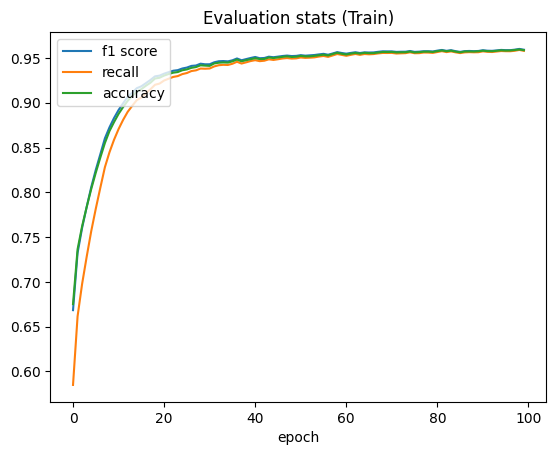

In [166]:
import matplotlib.pyplot as plt
from matplotlib import pyplot


# plot metrics
pyplot.plot(history.history["f1_m"],  label="f1 score")

pyplot.plot(history.history["recall_m"], label="recall")
pyplot.plot(history.history['acc'] , label="accuracy")
pyplot.title('Evaluation stats (Train)')
pyplot.xlabel("epoch")
pyplot.legend(loc="upper left")
pyplot.show()

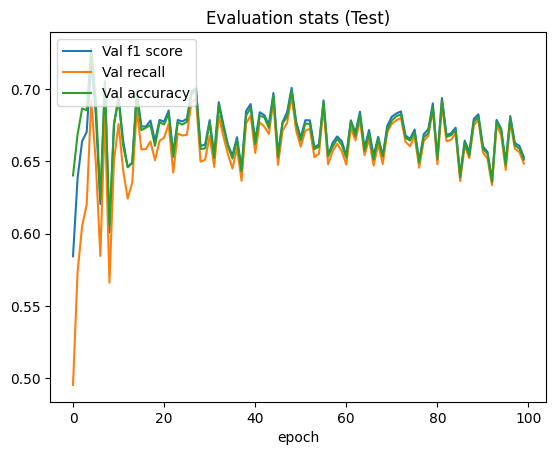

In [167]:
pyplot.plot(history.history["val_f1_m"],  label="Val f1 score")

pyplot.plot(history.history["val_recall_m"], label="Val recall")
pyplot.plot(history.history['val_acc'] , label="Val accuracy")
pyplot.xlabel("epoch")

pyplot.title('Evaluation stats (Test)')
pyplot.legend(loc="upper left")
pyplot.show()

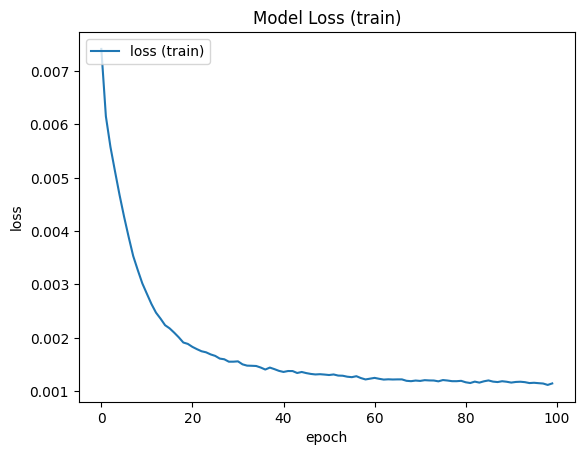

In [168]:
# plot metrics
import matplotlib.pyplot as pyplot

pyplot.plot(history.history["loss"],  label="loss (train)")
pyplot.xlabel("epoch")
pyplot.ylabel("loss")

pyplot.title('Model Loss (train)')
pyplot.legend(loc="upper left")
pyplot.show()

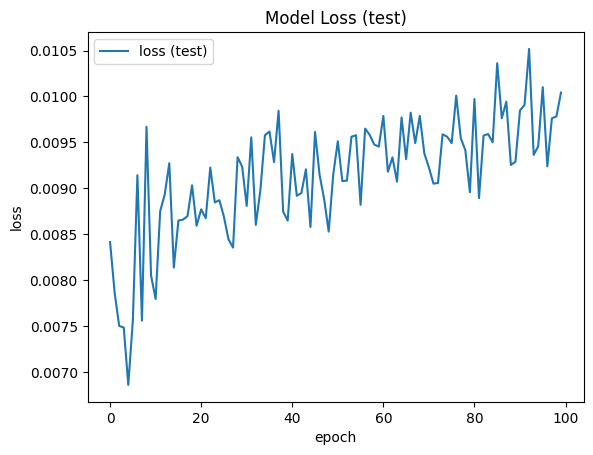

In [169]:
# plot metrics
import matplotlib.pyplot as pyplot

pyplot.plot(history.history["val_loss"],  label="loss (test)")
pyplot.xlabel("epoch")
pyplot.ylabel("loss")

pyplot.title('Model Loss (test)')
pyplot.legend(loc="upper left")
pyplot.show()

In [170]:
# serialize model to JSON
model_json = m.to_json()
with open("proposed_hybrid_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
m.save_weights("proposed_hybrid_model.h5")
print("Saved model to disk")

Saved model to disk


In [171]:
from gensim.models.keyedvectors import KeyedVectors

print("*****Loading pre-trained GloVe model for Nepali*******")
# Load the pre-trained GloVe model for Nepali
wv = KeyedVectors.load_word2vec_format('processed.glove', binary=False)
print("*****Completed*******")


*****Loading pre-trained GloVe model for Nepali*******
*****Completed*******


In [181]:
# Classify News Text to Category

politicsNews = "नेपाली काँग्रेसका सांसद बद्रीप्रसाद पाण्डेले एमाले अध्यक्ष केपी शर्मा ओलीले सरकारमाथि नै धावा बोल्ने काम गरिरहेको आरोप लगाउनु भएको छ । शनिबार प्रतिनिधिसभा बैठकमा बोल्दै उहाँले संविधानले नचिनेको ‘उच्चस्तरीय राजनीतिक संयन्त्रको संयोजक हुँ’ भन्दै ओलीले कार्यपालिकामाथि नै धावा बोल्ने काम गरिरहेको बताउनु भएको हो । सांसद पाण्डेले प्रतिनिधिसभा विघटन गर्नु संविधान विपरित हो भन्ने अदालतको फैसलामाथि नै अपमान गर्ने काम ओलीले गरिरहेको भन्दै आक्रोश समेत व्यक्त गर्नु भयो । संविधानले प्रधानमन्त्रीभन्दा माथि कार्यपालिकामा कोही पनि नहुने व्यवस्था गरे पनि ओलीले आफूलाई माथि छु भन्ने ठानेको उहाँको भनाई थियो ।"
chinaNews = "चीनमा गत जनवरी १३ देखि १९ को बीचमा लगभग १३ हजार कोभिड– १९ सङ्क्रमणको कारण मृत्यु भएको छ । गत जनवरी १२ सम्म अस्पतालमा कोभिडका कारण ६० हजार मानिसको मृत्यु भइसकेको थियो । अस्पतालमा भर्ना भएका छ सय ८१ बिरामीको कोरोना भाइरस सङ्क्रमणका कारण श्वासप्रश्वासको समस्याबाट मृत्यु भएको र एघार हजार नौ सय ७७ जनाको सङ्क्रमणसँगै अन्य रोगका कारण मृत्यु भएका चीनको सेन्टर फर डिजिज कन्ट्रोल एण्ड प्रिभेन्सन (सिडिसि) ले शनिबार जारी एक विज्ञप्तिमा जनाएको छ । गत डिसेम्बरमा चीनले शून्य–कोभिड नीति त्यागेपछि यस रोगबाट ६० हजार भन्दा बढी मानिसहरूको मृत्यु भएको सिडिसिले जनाएको छ ।"
sportsNews = "इटहरी उपमहानगरपालिकास्थित जनता माविको खेलमैदानमा आज सम्पन्न प्रधानमन्त्री कप महिला राष्ट्रिय टी-२० क्रिकेट प्रतियोगिताको उपाधि सुदूरपश्चिम प्रदेशले जितेको छ । फाइनल खेलमा घरेलु टोली प्रदेश नं १ लाई छ विकेटले पराजित गर्दै सुदूरपश्चिम विजयी भएको हो । प्रदेश नं १ ले दिएको एक सय दुई रनको लक्ष्य पाएको सुदूरपश्चिमले एक बल बाँकी छँदा लक्ष्य पूरा गरेको थियो । सुदूरपश्चिमको जितका लागि अन्तिम ओभरमा आठ रन आवश्यक आवश्यक थियो । जसमा ओभरको दोस्रो बलमा कविता कुँवरले छक्का प्रहार गरी टीमलाई विजयी बनाइन् । खेलको सुरुआतमा राम्रो प्रदर्शन नसकेको सुदूरपश्चिमको खेल मध्यक्रमका ब्याटर सम्झना खड्का र डली भट्टले सम्हालेका थिए । सम्झनाले ३३ बलमा दुई चौकासहित अविजित २७ रन बनाउँदा डलीले १६ बलमा एक चौका र दुई छक्कासहित २२ रनको योगदान दिएकी थिइन् । कविता १९ रनमा अविजित भइन् । बलिङतर्फ सवनम राई, हिरनमई रोय, रुविना क्षेत्री र सङ्गीता राईले १-१ विकेट लिएका थिए । टस जितेर पहिले ब्याटिङ गरेको प्रदेश नं १ ले २० ओभरमा पाँच विकेटको क्षतिमा एक सय एक रन बनाएको थियो । प्रदेश नं १ का लागि ओपनर काजल श्रेष्ठ र कप्तान रुविनाले ३६ रनको सुरुआती साझेदारी गरेका थिए ।"
economicNews = "नेपाल ट्रक यातायात व्यवसायी महासंघको एक प्रतिनिधि मण्डलले उपप्रधान तथा अर्थमन्त्री विष्णुप्रसाद पौडेलबीच शुक्रबार अर्थ मन्त्रालयमा भेटघाट सम्पन्न भएको छ । हाल यातायात क्षेत्रको ढुवानीमा देखिएको समस्याको बारेमा उक्त प्रतिनिधि मण्डलले अर्थमन्त्रीको ध्यानाकर्षण गराएको छ । भेटका क्रममा मालबाहक ढुवानी क्षेत्रमा देखिएका समस्याका बारेमा पनि अर्थ मन्त्रीलाई जानकारी गराइएको थियो। अर्थमन्त्री पौडेलले व्यवसायीको समस्या समाधानका पहल गर्ने प्रतिबद्धता व्यक्त गरेको महासंघका अध्यक्ष हिरालाल श्रेष्ठले जानकारी दिए । भेटघाट कार्यक्रममा महासंघका अध्यक्ष हिरालाल श्रेष्ठ, महासचिव राजेन्द्र विक्रम बानियाँ , कोषाध्यक्ष ओम कार्की लागतका व्यवसायीहरूको सहभागिता रहेको थियो । प्रतिनिधिमण्डलले मन्त्री पौडेललाई सफल कार्यकालका लागि शुभकामना पनि व्यक्त गरेको छ ।"
testNews = [politicsNews,
           sportsNews,
           economicNews,
#            chinaNews,
          ]

# Tokenize the input text data for prediction
tokenizer1 = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer1.fit_on_texts(testNews)
sequences1 = tokenizer.texts_to_sequences(testNews)
testData = pad_sequences(sequences1, maxlen=MAX_SEQUENCE_LENGTH)

print('Shape of data tensor:', testData.shape)


Shape of data tensor: (3, 1000)


In [182]:
def print_prediction(testData, model):
    print("*****EVALUATE REVIEW*******")
    y_pred = model.predict(testData)
    # Find the index of the highest probability for each sample
    predicted_categories = y_pred.argmax(axis=1)
    for each_review, each_y_pred in zip(reviews, predicted_categories):
        print("News Text:\n{0}\nCategory -> {1}".format(each_review, get_key(each_y_pred, labels_index)))
        print("\n")

def get_key(value, my_dict):
    for key, val in my_dict.items():
        if val == value:
            return key
    return None
print_prediction(testData, m)

*****EVALUATE REVIEW*******
1/1 [==============================] - 0s 46ms/step
News Text:
नेपाली काँग्रेसका सांसद बद्रीप्रसाद पाण्डेले एमाले अध्यक्ष केपी शर्मा ओलीले सरकारमाथि नै धावा बोल्ने काम गरिरहेको आरोप लगाउनु भएको छ । शनिबार प्रतिनिधिसभा बैठकमा बोल्दै उहाँले संविधानले नचिनेको ‘उच्चस्तरीय राजनीतिक संयन्त्रको संयोजक हुँ’ भन्दै ओलीले कार्यपालिकामाथि नै धावा बोल्ने काम गरिरहेको बताउनु भएको हो । सांसद पाण्डेले प्रतिनिधिसभा विघटन गर्नु संविधान विपरित हो भन्ने अदालतको फैसलामाथि नै अपमान गर्ने काम ओलीले गरिरहेको भन्दै आक्रोश समेत व्यक्त गर्नु भयो । संविधानले प्रधानमन्त्रीभन्दा माथि कार्यपालिकामा कोही पनि नहुने व्यवस्था गरे पनि ओलीले आफूलाई माथि छु भन्ने ठानेको उहाँको भनाई थियो ।
Category -> politics


News Text:
इटहरी उपमहानगरपालिकास्थित जनता माविको खेलमैदानमा आज सम्पन्न प्रधानमन्त्री कप महिला राष्ट्रिय टी-२० क्रिकेट प्रतियोगिताको उपाधि सुदूरपश्चिम प्रदेशले जितेको छ । फाइनल खेलमा घरेलु टोली प्रदेश नं १ लाई छ विकेटले पराजित गर्दै सुदूरपश्चिम विजयी भएको हो । प्रदेश नं १ ले दिएको एक सय दु

In [180]:
# load json and create model
# from keras.models import model_from_json 
from tensorflow.keras.models import Sequential, model_from_json
from keras_self_attention import SeqSelfAttention


json_file = open('proposed_hybrid_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json, custom_objects={'SeqSelfAttention': SeqSelfAttention})
# load weights into new model
loaded_model.load_weights("proposed_hybrid_model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
score = loaded_model.evaluate(x_val, y_val, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 65.11%
